In [97]:
import tensorflow as tf
import random
import numpy as np
import pandas as pd
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
import io



import sklearn
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K 

from matplotlib import pyplot as plt
from sklearn import linear_model, datasets
from sklearn.metrics import confusion_matrix
import itertools

In [98]:

df = pd.read_csv('fake_job_postings.csv')
#df = pd.read_csv("../input/real-or-fake-fake-jobposting-prediction/fake_job_postings.csv")
df['description'] = df['description'].astype(str)
df.head()



,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [99]:
#approximately 18k rows

df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                0
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [100]:
data = df[["description","fraudulent"]]
fraudulent_data = data.loc[df['fraudulent'] == 1]
correct_data = data.loc[df['fraudulent'] == 0]

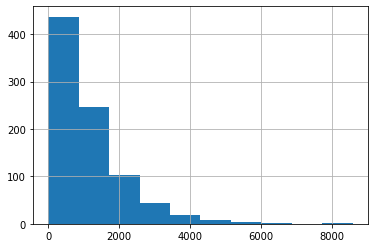

In [101]:
fraudulent_data['description'].str.len().hist()
#The histogram shows that fraudulent job descriptions range from 
#0 to 8000 characters and generally, it is between 0 to 2000 characters.

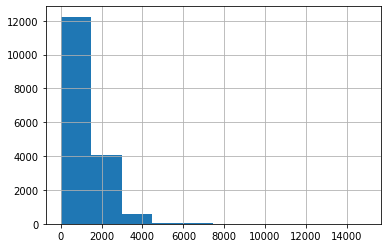

In [102]:
correct_data['description'].str.len().hist()
#The histogram shows that fraudulent job descriptions range from 
#0 to 8000 characters and generally, it is between 0 to 2000 characters.

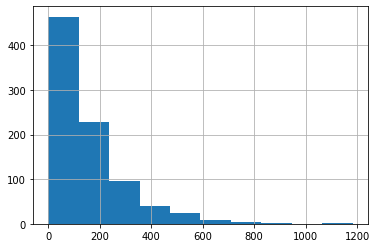

In [103]:
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()
plot_word_number_histogram(fraudulent_data['description'])

# the number of words in fraudulent job descriptions ranges from 0 to 1200 and mostly falls between 0 to 200 words

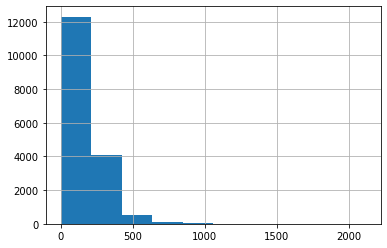

In [104]:
plot_word_number_histogram(correct_data['description'])
# the number of words in fraudulent job descriptions ranges from 0 to 1200 and mostly falls between 0 to 200 words

C:\Users\gbian007\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\gbian007\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


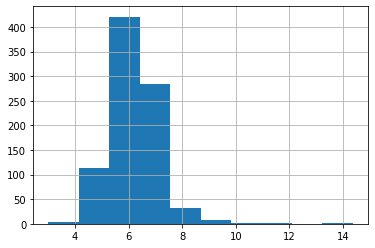

In [105]:
fraudulent_data['description'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()
# The average word length fro fraudulent job descriptions ranges
# between 2 to 15 with 6 being the most common length. Does it
# mean that people are using really short words in fake job description headlines?

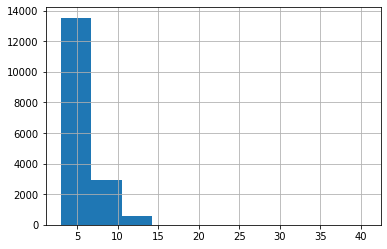

In [106]:
correct_data['description'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()
# The average word length fro fraudulent job descriptions ranges
# between 2 to 15 with 6 being the most common length. Does it
# mean that people are using really short words in fake job description headlines?

In [107]:

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gbian007\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


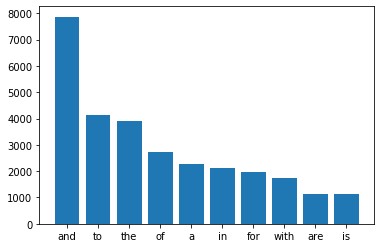

In [108]:
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)
plot_top_stopwords_barchart(fraudulent_data['description'])
#We can evidently see that stopwords such as “and”,” to” and “the” dominate in Fake job postings.    

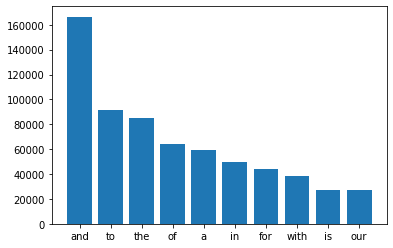

In [109]:
plot_top_stopwords_barchart(correct_data['description'])
#We can evidently see that stopwords such as “and”,” to” and “the” dominate in Fake job postings.

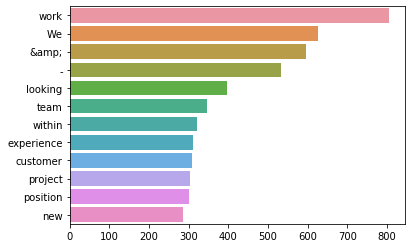

In [110]:
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)
plot_top_non_stopwords_barchart(fraudulent_data['description'])
# The “us”, “Iraq” and “war” dominate the headlines over the last 15 years

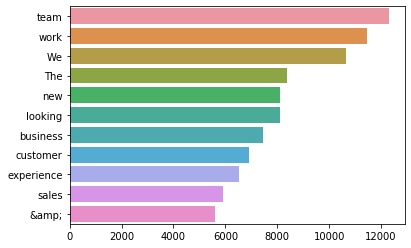

In [111]:
plot_top_non_stopwords_barchart(correct_data['description'])
#The “us”, “Iraq” and “war” dominate the headlines over the last 15 years

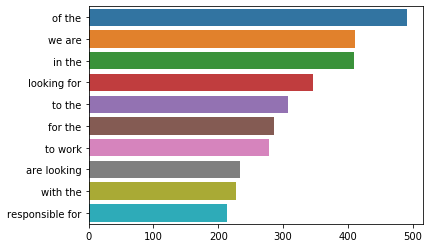

In [112]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)
plot_top_ngrams_barchart(fraudulent_data['description'],n=2)

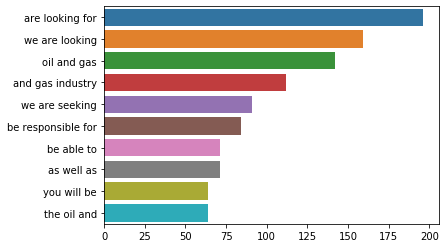

In [113]:
plot_top_ngrams_barchart(fraudulent_data['description'],n=3)

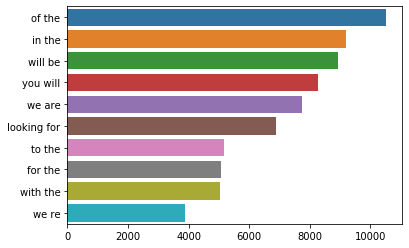

In [114]:
plot_top_ngrams_barchart(correct_data['description'],n=2)

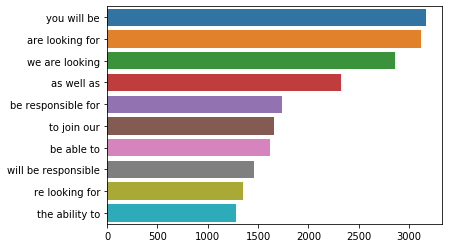

In [115]:
plot_top_ngrams_barchart(correct_data['description'],n=3)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gbian007\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gbian007\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gbian007\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


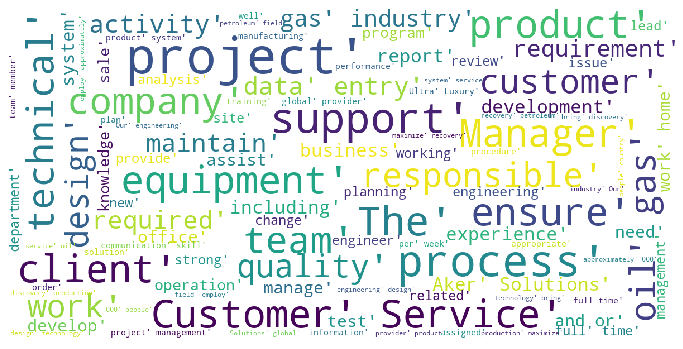

In [116]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('punkt')
nltk.download('wordnet')

def plot_wordcloud(text):
    nltk.download('stopwords')
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()
plot_wordcloud(fraudulent_data['description'])    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gbian007\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


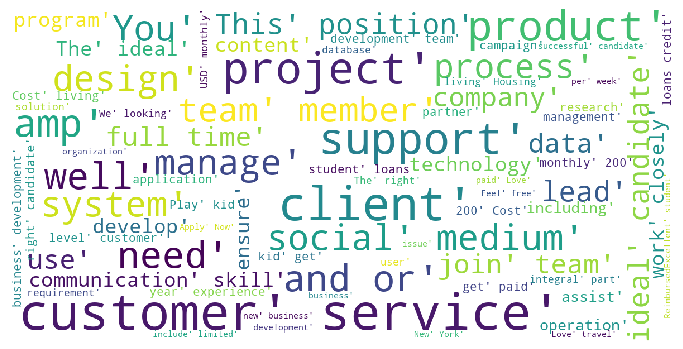

In [117]:
plot_wordcloud(correct_data['description'])    

In [118]:
# the model will remember only the top 2000 most common words
max_words = 1000
max_len = 400

token = Tokenizer(num_words = max_words, split=' ')
token.fit_on_texts(X_train.values)
sequences = token.texts_to_sequences(X_train.values)
train_sequences_padded = pad_sequences(sequences, maxlen=max_len)
train_sequences_padded.shape

(13410, 400)

In [119]:
embed_dim = 60
lstm_out = 64
batch_size = 64
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_words, embed_dim, input_length = max_len))
model.add(tf.keras.layers.LSTM(lstm_out))
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(1, name='out_layer'))
model.add(tf.keras.layers.Activation('sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',\
               metrics = ['accuracy'])
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 400, 60)           60000     
_________________________________________________________________
lstm_7 (LSTM)                (None, 64)                32000     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               16640     
_________________________________________________________________
activation_14 (Activation)   (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
_________________________________________________________________
activation_15 (Activation)   (None, 1)                 0         
Total params: 108,897
Trainable params: 108,897
Non-trainable params: 0
________________________________________________

In [120]:
history = model.fit(np.asarray(train_sequences_padded), np.asarray(y_train), batch_size=batch_size, epochs = 5, validation_split=0.2)

Epoch 1/5
168/168 [==============================] - 20s 120ms/step - loss: 0.2128 - accuracy: 0.9513 - val_loss: 0.1623 - val_accuracy: 0.9556
Epoch 2/5
168/168 [==============================] - 20s 119ms/step - loss: 0.1226 - accuracy: 0.9638 - val_loss: 0.1410 - val_accuracy: 0.9609
Epoch 3/5
168/168 [==============================] - 20s 119ms/step - loss: 0.0998 - accuracy: 0.9703 - val_loss: 0.1382 - val_accuracy: 0.9623
Epoch 4/5
168/168 [==============================] - 20s 119ms/step - loss: 0.0825 - accuracy: 0.9752 - val_loss: 0.1753 - val_accuracy: 0.9635
Epoch 5/5
168/168 [==============================] - 20s 120ms/step - loss: 0.0666 - accuracy: 0.9796 - val_loss: 0.1505 - val_accuracy: 0.9668


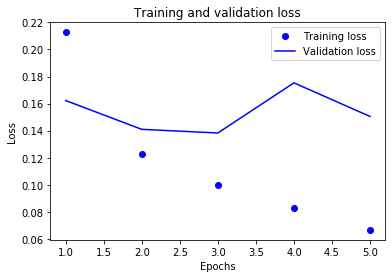

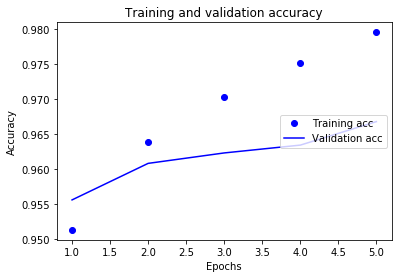

In [121]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
history_dict = history.history
history_dict.keys()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='center right')

plt.show()

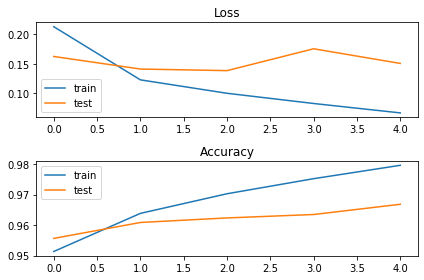

In [122]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.tight_layout()
plt.legend()
plt.show()

In [123]:
test_sequences = token.texts_to_sequences(X_test)
test_sequences_padded = pad_sequences(test_sequences,maxlen=max_len)
model.evaluate(np.asarray(test_sequences_padded), np.asarray(y_test))


140/140 [==============================] - 3s 24ms/step - loss: 0.1424 - accuracy: 0.9660


[0.14237676560878754, 0.9659955501556396]

In [124]:
y_true = np.asarray(y_test)
y_pred = model.predict(np.asarray(np.asarray(y_test)))
np.unique(y_pred.round())

array([0.], dtype=float32)

[[4247    0]
 [ 223    0]]


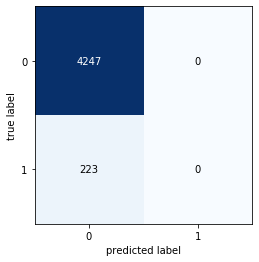

In [125]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

matrix = confusion_matrix(y_true, y_pred.round())
print(matrix)
fig, ax = plot_confusion_matrix(conf_mat=matrix)
plt.show()